In [59]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
%matplotlib inline
from autots import AutoTS


In [2]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [3]:
init_notebook_mode(connected=True)

In [4]:
exp = pd.read_csv('2011_US_AGRI_Exports')

In [5]:
exp

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...
5,CO,Colorado,state,1851.33,261.4,66.0,14.0,71.94,5.7,12.2,17.99,45.1,73.2,118.27,183.2,400.5,0.00,Colorado<br>Beef 261.4 Dairy 71.94<br>Fruits 1...
6,CT,Connecticut,state,259.62,1.1,0.1,6.9,9.49,4.2,8.9,13.10,4.3,6.9,11.16,0.0,0.0,0.00,Connecticut<br>Beef 1.1 Dairy 9.49<br>Fruits 1...
7,DE,Delaware,state,282.19,0.4,0.6,114.7,2.30,0.5,1.0,1.53,7.6,12.4,20.03,26.9,22.9,0.00,Delaware<br>Beef 0.4 Dairy 2.3<br>Fruits 1.53 ...
8,FL,Florida,state,3764.09,42.6,0.9,56.9,66.31,438.2,933.1,1371.36,171.9,279.0,450.86,3.5,1.8,78.24,Florida<br>Beef 42.6 Dairy 66.31<br>Fruits 137...
9,GA,Georgia,state,2860.84,31.0,18.9,630.4,38.38,74.6,158.9,233.51,59.0,95.8,154.77,57.8,65.4,1154.07,Georgia<br>Beef 31.0 Dairy 38.38<br>Fruits 233...


In [6]:
exp.describe()

,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,2728.889000,108.394000,122.282000,112.700000,95.725200,90.05000,191.736000,281.79000,44.428000,72.102000,116.523800,273.042000,222.824000,169.32500
std,3144.837608,193.762904,303.492907,162.878644,168.016886,402.16488,856.334256,1258.49891,116.513625,189.088833,305.615222,556.824919,362.291291,402.92782
min,13.310000,0.100000,0.000000,0.000000,0.190000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,465.142500,13.400000,0.525000,2.950000,6.980000,2.12500,4.550000,6.67000,4.325000,6.950000,11.232500,5.875000,8.500000,0.00000
50%,1822.950000,41.050000,16.800000,33.550000,32.165000,4.80000,10.300000,15.11000,12.500000,20.350000,32.910000,37.200000,78.100000,0.00000
75%,3768.665000,106.725000,84.975000,162.425000,101.535000,25.30000,53.925000,79.24000,45.700000,74.175000,119.845000,182.175000,248.725000,102.46500
max,16472.880000,961.000000,1895.600000,630.400000,929.950000,2791.80000,5944.600000,8736.40000,803.200000,1303.500000,2106.790000,2529.800000,1664.500000,2308.76000


In [7]:
exp.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_5484\1029250583.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton
total exports,1.000000,0.458794,0.540014,0.245310,0.582472,0.631087,0.631103,0.631101,0.635084,0.635107,0.635120,0.631140,0.235126,0.368125
beef,0.458794,1.000000,0.204522,0.052795,0.179425,0.069559,0.069565,0.069561,0.083844,0.083865,0.083863,0.325479,0.355487,0.478439
pork,0.540014,0.204522,1.000000,0.187752,0.010602,-0.079007,-0.078988,-0.078990,-0.078251,-0.078237,-0.078232,0.770032,0.014054,-0.064012
poultry,0.245310,0.052795,0.187752,1.000000,0.011617,0.083640,0.083670,0.083659,0.081216,0.081215,0.081201,-0.019033,-0.138554,0.614722
dairy,0.582472,0.179425,0.010602,0.011617,1.000000,0.720998,0.720993,0.720999,0.766206,0.766219,0.766228,0.044129,0.027174,0.269166
fruits fresh,0.631087,0.069559,-0.079007,0.083640,0.720998,1.000000,1.000000,1.000000,0.969611,0.969612,0.969613,-0.091823,0.032449,0.307506
fruits proc,0.631103,0.069565,-0.078988,0.083670,0.720993,1.000000,1.000000,1.000000,0.969612,0.969612,0.969614,-0.091808,0.032436,0.307524
total fruits,0.631101,0.069561,-0.078990,0.083659,0.720999,1.000000,1.000000,1.000000,0.969613,0.969613,0.969614,-0.091808,0.032436,0.307517
veggies fresh,0.635084,0.083844,-0.078251,0.081216,0.766206,0.969611,0.969612,0.969613,1.000000,1.000000,1.000000,-0.094406,0.066485,0.336901
veggies proc,0.635107,0.083865,-0.078237,0.081215,0.766219,0.969612,0.969612,0.969613,1.000000,1.000000,1.000000,-0.094371,0.066428,0.336941


In [8]:
print('This shows how the export of a product affects the other products. '
     'Correlation value -1 means when one variable increases, the other decreases in a perfectly linear fashion.'
     'Correlation value between -1 and -0.7 means a strong negative relationship, but not perfect. As one variable increases, the other tends to decrease significantly. '
     'Correlation value between -0.7 and -0.3 means a moderate negative relationship. As one variable increases, the other tends to decrease, but the relationship is not very strong. '
     'Correlation value between -0.3 and 0 means a weak negative relationship. There is a slight tendency for one variable to decrease as the other increases. Correltion value between 0 and 0.3 means a weak positive relationship. There is slight tendency for one variable to increase as the other increases. Correlation values between 0.3 and 0.7 means a moderate positive relationship. As one variable increases, the other tends to increase, but the relationship is not very strong. '
     'Correlation value between 0.7 and 1 indicates a strong positive relationship, but not perfect. As one variable increases the other tends to increase significantly. '
     'Correlation value of 1 means when one variable increases the other increases in a perfectly linear fashion. Correlation value of 0 indicates no relationship between the two variables. ')



This shows how the export of a product affects the other products. Correlation value -1 means when one variable increases, the other decreases in a perfectly linear fashion.Correlation value between -1 and -0.7 means a strong negative relationship, but not perfect. As one variable increases, the other tends to decrease significantly. Correlation value between -0.7 and -0.3 means a moderate negative relationship. As one variable increases, the other tends to decrease, but the relationship is not very strong. Correlation value between -0.3 and 0 means a weak negative relationship. There is a slight tendency for one variable to decrease as the other increases. Correltion value between 0 and 0.3 means a weak positive relationship. There is slight tendency for one variable to increase as the other increases. Correlation values between 0.3 and 0.7 means a moderate positive relationship. As one variable increases, the other tends to increase, but the relationship is not very strong. Correlati

C:\Users\USER\AppData\Local\Temp\ipykernel_5484\3549475397.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

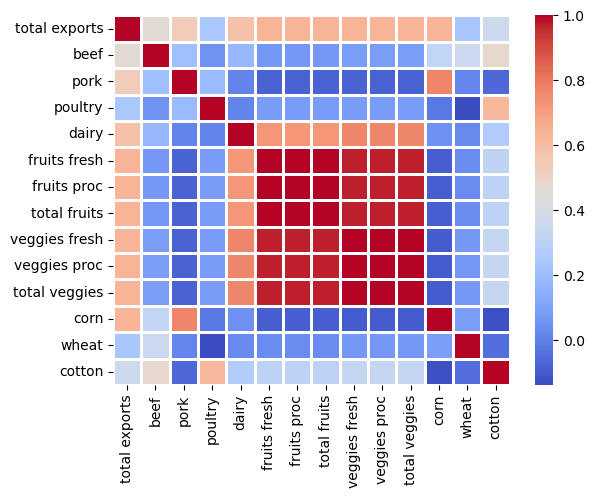

In [9]:
sns.heatmap(exp.corr(),cmap='coolwarm',linewidth=1)

In [10]:
print('Which State has the highest total exports?')

Which State has the highest total exports?


In [11]:
exp[exp['total exports'] == exp['total exports'].max()]

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.4,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


In [12]:
print('Which state has the lowest total exports?')

Which state has the lowest total exports?


In [13]:
exp[exp['total exports']==exp['total exports'].min()]

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.0,0.6,1.0,1.56,0.0,0.0,0.0,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...


In [14]:
print('Which State is the highest exporter of beef?')

Which State is the highest exporter of beef?


In [15]:
exp[exp['beef']==exp['beef'].max()]

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
42,TX,Texas,state,6648.22,961.0,42.7,339.2,240.55,31.9,68.0,99.9,43.9,71.3,115.23,167.2,309.7,2308.76,Texas<br>Beef 961.0 Dairy 240.55<br>Fruits 99....


In [16]:
print('Which State is the lowest exporter of beef?')

Which State is the lowest exporter of beef?


In [17]:
exp[exp['beef']==exp['beef'].min()]

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
38,RI,Rhode Island,state,31.59,0.1,0.1,0.2,0.52,0.9,1.9,2.83,1.2,1.9,3.02,0.0,0.0,0.0,Rhode Island<br>Beef 0.1 Dairy 0.52<br>Fruits ...


In [18]:
print('Which State is the highest exporter of wheat?')

Which State is the highest exporter of wheat?


In [19]:
exp[exp['wheat']==exp['wheat'].max()]

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
33,ND,North Dakota,state,3761.96,78.5,16.1,0.5,8.14,0.1,0.2,0.25,49.9,80.9,130.79,236.1,1664.5,0.0,North Dakota<br>Beef 78.5 Dairy 8.14<br>Fruits...


In [20]:
exp.columns

Index(['code', 'state', 'category', 'total exports', 'beef', 'pork', 'poultry',
       'dairy', 'fruits fresh', 'fruits proc', 'total fruits', 'veggies fresh',
       'veggies proc', 'total veggies', 'corn', 'wheat', 'cotton', 'text'],
      dtype='object')

In [21]:
X = exp[['beef', 'pork', 'poultry',
       'dairy', 'fruits fresh', 'fruits proc', 'total fruits', 'veggies fresh',
       'veggies proc', 'total veggies', 'corn', 'wheat', 'cotton']]

In [22]:
y=exp['total exports']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train,y_train)

LinearRegression()

In [28]:
print(lm.coef_)

[ 2.59592430e-01  2.05556126e+00  1.77076706e+00  7.96308639e-01
 -1.48755261e+03 -3.20651914e+02  6.94629179e+02 -7.96584731e+02
  1.62580091e+03 -7.00018642e+02  3.25520500e+00  1.42448487e+00
  5.14482330e-01]


In [29]:
prediction = lm.predict(X_train)

In [30]:
prediction

array([  648.12561009,  4448.26907089,   457.79734317,   681.83758403,
         302.32742028,   320.02631721,  1009.53536199,   467.06054155,
         325.44251035,  2060.97877725,  3647.99685353,  1496.95405266,
        1600.13058196,   397.55961494,  3176.4144512 ,  1697.03721858,
        3081.12506307,   782.92547808,   510.78198135,  8834.03384019,
        2113.78659526,  1642.6305049 ,   264.37160259, 16585.94745498,
        3808.41883157,  5301.08515026,  3024.49930933,  3025.96187417,
        1844.03929592,   263.38879997,  1056.27363683,  2188.40414822,
        1512.99312362])

In [31]:
cdf = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coefficients'])

In [32]:
cdf

,Coefficients
beef,0.259592
pork,2.055561
poultry,1.770767
dairy,0.796309
fruits fresh,-1487.552614
fruits proc,-320.651914
total fruits,694.629179
veggies fresh,-796.584731
veggies proc,1625.800906
total veggies,-700.018642


<Axes: xlabel='total veggies', ylabel='total exports'>

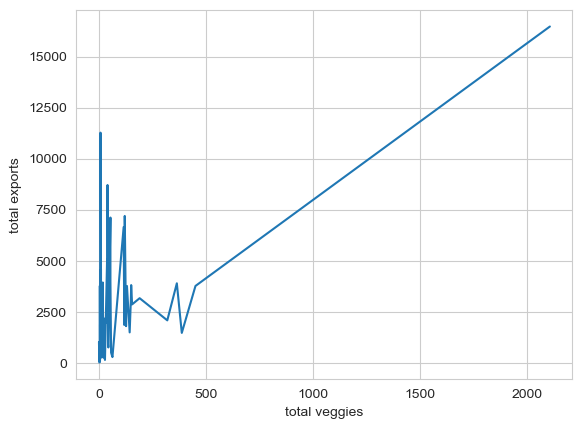

In [33]:
sns.set_style('whitegrid')
sns.lineplot(x=exp['total veggies'], y=exp['total exports'])

<Axes: xlabel='corn', ylabel='total exports'>

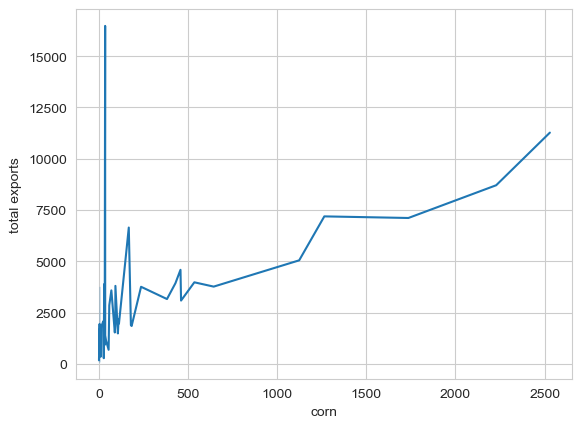

In [34]:
sns.lineplot(x=exp['corn'], y=exp['total exports'])

<Axes: xlabel='wheat', ylabel='total exports'>

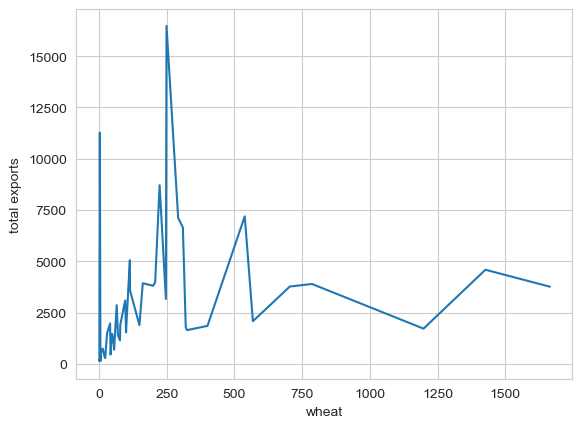

In [35]:
sns.lineplot(x=exp['wheat'], y=exp['total exports'])

<Axes: xlabel='cotton', ylabel='total exports'>

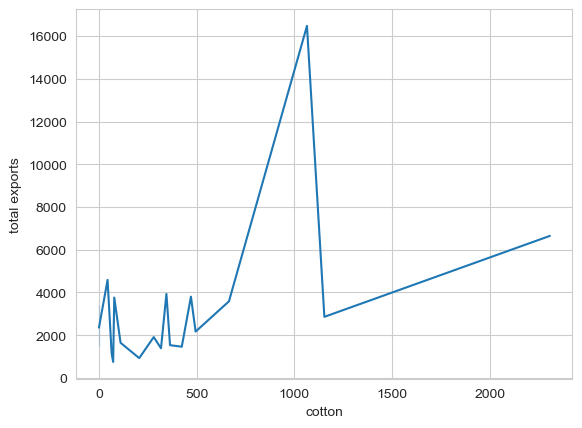

In [36]:
sns.lineplot(x=exp['cotton'], y=exp['total exports'])

<Axes: xlabel='poultry', ylabel='total exports'>

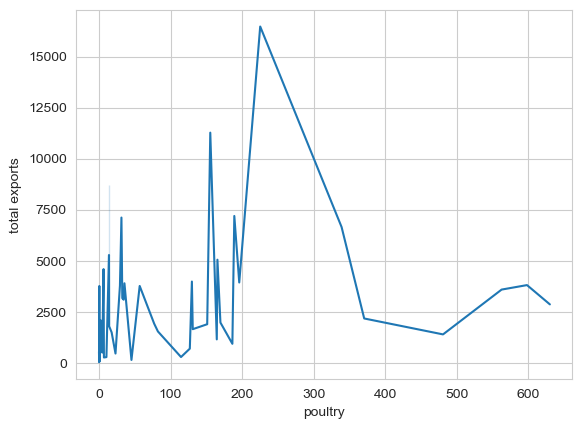

In [37]:
sns.lineplot(x=exp['poultry'], y=exp['total exports'])

<Axes: xlabel='total fruits', ylabel='total exports'>

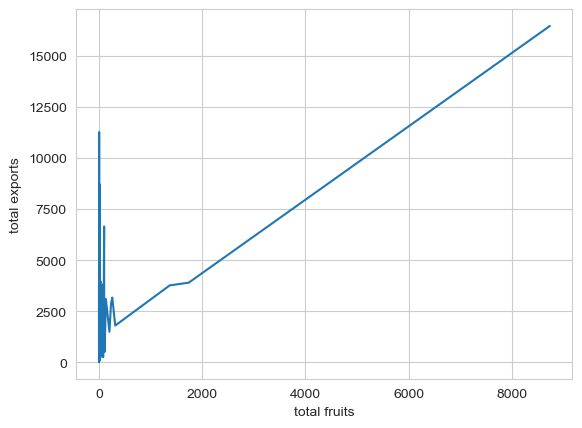

In [38]:
sns.lineplot(x=exp['total fruits'], y=exp['total exports'])

<Axes: xlabel='beef', ylabel='total exports'>

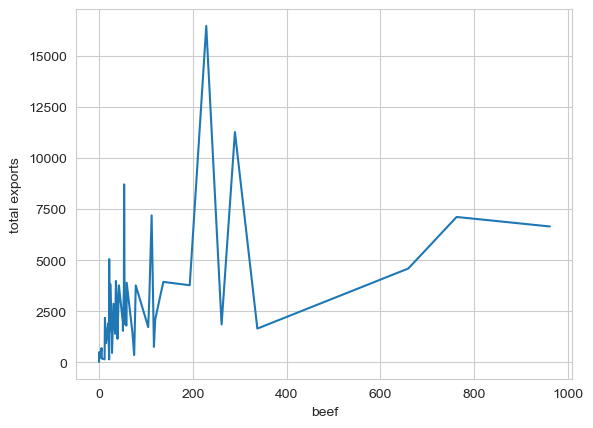

In [39]:
sns.lineplot(x=exp['beef'], y=exp['total exports'])

<Axes: xlabel='pork', ylabel='total exports'>

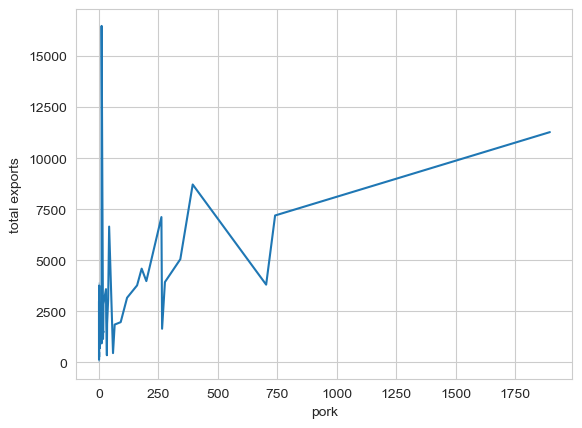

In [40]:
sns.lineplot(x=exp['pork'], y=exp['total exports'])

<Axes: xlabel='dairy', ylabel='total exports'>

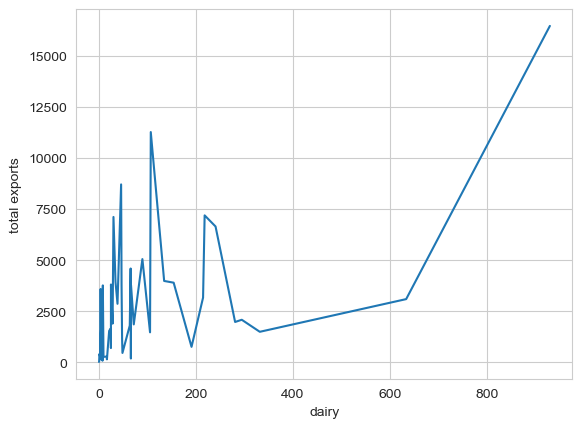

In [41]:
sns.lineplot(x=exp['dairy'], y=exp['total exports'])

In [42]:
data = dict(type='choropleth',
           colorscale='Portland',
           locations = exp['code'],
           locationmode= 'USA-states',
           z= exp['total exports'],
           text = exp['text'],
           marker = dict(line = dict(color = 'rgb(255,255,255)', width=2)),
           colorbar = {'title':'Millions USD'}
           )

In [43]:
layout = dict(title = '2011 US Agricultural Exports By States',
             geo = {'scope':'usa'})

In [44]:
choromap = go.Figure(data=[data],layout=layout)

In [51]:
iplot(choromap)

In [46]:
choromap.write_html('US Export.html')

In [60]:
print('Please check the file US Export for the geographical plot')

Please check the file US Export for the geographical plot
